## Setup

In [1]:
%pip install ultralytics > /dev/null 2>&1

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.102 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Setup complete ✅ (48 CPUs, 188.5 GB RAM, 6.5/94.3 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zEbKQP7X3qDC9M09CI5O")
project = rf.workspace("whalecrop").project("cetacean-detector")
version = project.version(4)
dataset = version.download("yolov8")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.102, to fix: `pip install ultralytics==8.0.196`


In [3]:
pip install -U ultralytics

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
print(dataset.location)

/home/jctactay/Cetacean-Detector-4


In [5]:
from ultralytics import YOLO

## Training

### Initial training

In [6]:
model = YOLO('yolov8s.pt')

In [7]:
model.train(data=f"{dataset.location}/data.yaml", epochs=50, imgsz=640, batch=32, single_cls=True, cache=True, patience=10)

New https://pypi.org/project/ultralytics/8.2.101 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.100 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/jctactay/Cetacean-Detector-4/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train21, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, e

train: Scanning /home/jctactay/Cetacean-Detector-4/train/labels.cache... 2300 images, 259 backgrounds, 0 corrupt: 100%|██████████| 2300/2300 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.7GB RAM): 100%|██████████| 2300/2300 [03:55<00:00,  9.77it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
val: Scanning /home/jctactay/Cetacean-Detector-4/valid/labels.cache... 378 images, 57 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.3GB RAM): 100%|██████████| 378/378 [00:44<00:00,  8.51it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train21/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train21
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.65G      1.443      1.955      1.557         58        640: 100%|██████████| 72/72 [00:22<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        378        562      0.464      0.476      0.458      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.62G      1.434      1.265      1.532         75        640: 100%|██████████| 72/72 [00:18<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.62it/s]


                   all        378        562      0.273      0.406      0.219      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.62G      1.397      1.198      1.501         79        640: 100%|██████████| 72/72 [00:20<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]


                   all        378        562      0.329      0.363      0.274      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.63G      1.401      1.168      1.498         73        640: 100%|██████████| 72/72 [00:20<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.83it/s]


                   all        378        562      0.664      0.541      0.583      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.62G      1.339      1.121      1.451         56        640: 100%|██████████| 72/72 [00:21<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.53it/s]

                   all        378        562      0.244      0.363      0.205     0.0983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.62G      1.271      1.022      1.409         70        640: 100%|██████████| 72/72 [00:20<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]


                   all        378        562      0.706      0.587      0.676      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.62G      1.234     0.9735       1.38         81        640: 100%|██████████| 72/72 [00:20<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]

                   all        378        562       0.58      0.569       0.57      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.62G      1.237     0.9695      1.374         72        640: 100%|██████████| 72/72 [00:20<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.14it/s]


                   all        378        562      0.681      0.587      0.662      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.62G      1.206     0.9137      1.363         84        640: 100%|██████████| 72/72 [00:21<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.66it/s]

                   all        378        562       0.63      0.539      0.624      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.62G      1.149     0.8831      1.312         83        640: 100%|██████████| 72/72 [00:20<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.31it/s]

                   all        378        562       0.72      0.658      0.738      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.62G      1.123     0.8513      1.302         60        640: 100%|██████████| 72/72 [00:20<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]

                   all        378        562      0.706      0.673      0.749       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.62G      1.111     0.8023      1.285         73        640: 100%|██████████| 72/72 [00:20<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.09it/s]

                   all        378        562      0.685      0.663      0.728      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.62G      1.087      0.805      1.274         58        640: 100%|██████████| 72/72 [00:20<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]


                   all        378        562      0.713       0.68      0.748      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.62G       1.06     0.7789      1.257         75        640: 100%|██████████| 72/72 [00:20<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.69it/s]

                   all        378        562      0.615      0.649      0.672      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.62G       1.02     0.7415      1.233         65        640: 100%|██████████| 72/72 [00:20<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.42it/s]

                   all        378        562      0.685       0.69       0.76      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.62G      1.013     0.7453      1.238         69        640: 100%|██████████| 72/72 [00:21<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]


                   all        378        562      0.632      0.714       0.74      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.62G     0.9995     0.7258      1.221         61        640: 100%|██████████| 72/72 [00:20<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.75it/s]


                   all        378        562      0.741      0.706      0.781      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.62G     0.9774      0.704      1.208         61        640: 100%|██████████| 72/72 [00:21<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.62it/s]


                   all        378        562       0.76      0.676       0.78      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.62G     0.9494     0.6863      1.189         79        640: 100%|██████████| 72/72 [00:20<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all        378        562      0.732      0.698      0.772      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.62G     0.9383     0.6674       1.18         62        640: 100%|██████████| 72/72 [00:20<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all        378        562      0.719       0.71      0.784      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.62G     0.9249     0.6765      1.169         77        640: 100%|██████████| 72/72 [00:21<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.61it/s]


                   all        378        562      0.705      0.626      0.724      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.62G     0.9009      0.651      1.162         74        640: 100%|██████████| 72/72 [00:21<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.09it/s]

                   all        378        562      0.755       0.74      0.801      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.62G     0.8507     0.6153      1.138         64        640: 100%|██████████| 72/72 [00:20<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.83it/s]

                   all        378        562      0.762      0.742      0.814      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.62G     0.8627     0.6145      1.146         74        640: 100%|██████████| 72/72 [00:20<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]


                   all        378        562      0.754      0.711      0.789      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.62G     0.8521     0.6082      1.134         52        640: 100%|██████████| 72/72 [00:20<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.04it/s]


                   all        378        562      0.752      0.749      0.808       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.62G     0.8342     0.6001      1.123         65        640: 100%|██████████| 72/72 [00:20<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.69it/s]


                   all        378        562      0.817      0.719      0.823      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.62G     0.8179     0.5928      1.113         70        640: 100%|██████████| 72/72 [00:20<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]


                   all        378        562      0.793      0.757      0.823      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.62G     0.7943     0.5686      1.103         69        640: 100%|██████████| 72/72 [00:20<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]

                   all        378        562      0.783       0.73      0.808      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.62G     0.7818      0.574      1.102         70        640: 100%|██████████| 72/72 [00:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]

                   all        378        562      0.774      0.744      0.819      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.62G     0.7705     0.5458       1.09         66        640: 100%|██████████| 72/72 [00:20<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]

                   all        378        562       0.77      0.753      0.817      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.62G     0.7499     0.5396      1.081         64        640: 100%|██████████| 72/72 [00:20<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]

                   all        378        562      0.793      0.721      0.818      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.62G     0.7313     0.5214      1.074         75        640: 100%|██████████| 72/72 [00:20<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.86it/s]

                   all        378        562      0.807      0.742      0.833      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.62G     0.7287     0.5153       1.07         59        640: 100%|██████████| 72/72 [00:20<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]

                   all        378        562      0.691      0.772      0.806      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.62G     0.7109     0.5109      1.057         73        640: 100%|██████████| 72/72 [00:20<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.70it/s]

                   all        378        562      0.769      0.786      0.841      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.62G     0.7105     0.5112      1.062         62        640: 100%|██████████| 72/72 [00:20<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]

                   all        378        562      0.768      0.761      0.817      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.62G     0.6793     0.4953      1.037         71        640: 100%|██████████| 72/72 [00:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]

                   all        378        562      0.759       0.79      0.839      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.62G     0.6793     0.4907      1.043         60        640: 100%|██████████| 72/72 [00:18<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]

                   all        378        562      0.767      0.755      0.827      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.62G     0.6529     0.4729      1.029         71        640: 100%|██████████| 72/72 [00:20<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.18it/s]

                   all        378        562      0.783      0.742      0.834      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.62G     0.6517     0.4758      1.033         70        640: 100%|██████████| 72/72 [00:20<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]


                   all        378        562      0.801      0.752      0.838      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.62G      0.625     0.4595      1.026         58        640: 100%|██████████| 72/72 [00:21<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.61it/s]

                   all        378        562      0.793      0.822      0.863      0.555


Closing dataloader mosaic


This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.62G      1.116     0.8189      1.265         37        640: 100%|██████████| 72/72 [00:19<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.06it/s]

                   all        378        562      0.804      0.753      0.859      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.62G      1.066     0.7651      1.226         34        640: 100%|██████████| 72/72 [00:17<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]


                   all        378        562      0.804      0.769      0.858      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.62G      1.043     0.7249      1.213         29        640: 100%|██████████| 72/72 [00:17<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.63it/s]

                   all        378        562      0.855      0.735      0.865      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.62G      1.029     0.7138      1.198         33        640: 100%|██████████| 72/72 [00:18<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.55it/s]

                   all        378        562      0.789       0.79      0.866       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.61G     0.9862     0.6817      1.173         29        640: 100%|██████████| 72/72 [00:16<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.87it/s]

                   all        378        562      0.777      0.792      0.865      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.62G     0.9826     0.6572      1.172         37        640: 100%|██████████| 72/72 [00:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.21it/s]

                   all        378        562      0.822      0.808      0.878       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.62G      0.959     0.6409      1.154         30        640: 100%|██████████| 72/72 [00:17<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.81it/s]

                   all        378        562      0.793      0.827      0.875      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.62G     0.9414     0.6313      1.141         27        640: 100%|██████████| 72/72 [00:17<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.66it/s]

                   all        378        562       0.82      0.824      0.879      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.62G     0.9313     0.6351      1.142         29        640: 100%|██████████| 72/72 [00:17<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]

                   all        378        562      0.818      0.816      0.878      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.62G     0.9175     0.6061      1.132         26        640: 100%|██████████| 72/72 [00:17<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.75it/s]

                   all        378        562      0.818      0.831      0.883      0.588



50 epochs completed in 0.351 hours.
Optimizer stripped from runs/detect/train21/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train21/weights/best.pt, 22.5MB

Validating runs/detect/train21/weights/best.pt...
Ultralytics YOLOv8.2.100 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]


                   all        378        562      0.818      0.832      0.884      0.588
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train21


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x14b72d1221d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

### Lower batch training

In [8]:
model = YOLO("yolov8s.pt")
model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640, single_cls=True, cache=True, patience=10)

New https://pypi.org/project/ultralytics/8.2.102 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.101 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/jctactay/Cetacean-Detector-4/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

train: Scanning /home/jctactay/Cetacean-Detector-4/train/labels.cache... 2300 images, 259 backgrounds, 0 corrupt: 100%|██████████| 2300/2300 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.7GB RAM): 100%|██████████| 2300/2300 [04:26<00:00,  8.64it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
val: Scanning /home/jctactay/Cetacean-Detector-4/valid/labels.cache... 378 images, 57 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.3GB RAM): 100%|██████████| 378/378 [00:48<00:00,  7.82it/s]
This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Plotting labels to runs/detect/train24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train24
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.71G      1.447       1.86      1.491         17        640: 100%|██████████| 144/144 [00:25<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.00it/s]

                   all        378        562      0.394      0.496      0.405      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.67G      1.477      1.299      1.495         32        640: 100%|██████████| 144/144 [00:21<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]

                   all        378        562      0.533      0.547      0.516      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.68G      1.419      1.186      1.443         32        640: 100%|██████████| 144/144 [00:21<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.69it/s]

                   all        378        562      0.434      0.454      0.404      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.68G       1.41      1.149      1.441         21        640: 100%|██████████| 144/144 [00:21<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]

                   all        378        562      0.635      0.548      0.578      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.69G      1.325      1.055      1.389         19        640: 100%|██████████| 144/144 [00:21<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.62it/s]

                   all        378        562      0.424      0.554      0.468      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.68G      1.266     0.9745      1.352         24        640: 100%|██████████| 144/144 [00:21<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all        378        562      0.511      0.568      0.539      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.68G      1.209     0.9501      1.315         26        640: 100%|██████████| 144/144 [00:21<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all        378        562      0.656      0.622       0.69      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.68G       1.19     0.9305      1.288         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.60it/s]


                   all        378        562      0.699      0.578      0.661      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.68G       1.13     0.8643      1.266         33        640: 100%|██████████| 144/144 [00:21<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all        378        562      0.592      0.575      0.646      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.68G      1.121      0.856      1.256         34        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all        378        562      0.704      0.564      0.678      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.68G      1.076     0.8192      1.238         26        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all        378        562      0.674      0.712       0.73      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.68G      1.043     0.7921      1.213         20        640: 100%|██████████| 144/144 [00:21<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]


                   all        378        562      0.683      0.617      0.707      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.68G      1.031     0.7751      1.208         18        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]

                   all        378        562      0.705       0.66       0.72      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.68G     0.9799     0.7318      1.182         24        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]

                   all        378        562      0.652      0.623      0.672      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.68G     0.9744     0.7339      1.181         26        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]

                   all        378        562      0.647       0.63      0.696      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.68G     0.9473     0.7125      1.169         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.30it/s]

                   all        378        562      0.715      0.671      0.742      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.68G       0.92     0.6784      1.145         19        640: 100%|██████████| 144/144 [00:21<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.72it/s]

                   all        378        562       0.68      0.728      0.761      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.68G     0.9011     0.6776       1.14         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all        378        562      0.677      0.648      0.728      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.68G     0.8989     0.6722      1.148         25        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.64it/s]


                   all        378        562      0.646      0.696      0.711      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.68G     0.8922     0.6705      1.134         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.59it/s]

                   all        378        562      0.718      0.649      0.739      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.68G      0.877     0.6576      1.124         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.63it/s]

                   all        378        562       0.65       0.66      0.722      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.68G     0.8249     0.6193      1.103         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all        378        562      0.719      0.699      0.744       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.68G     0.8036     0.5939      1.096         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]

                   all        378        562      0.761      0.704      0.778      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.68G     0.8063     0.6081      1.088         29        640: 100%|██████████| 144/144 [00:21<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]

                   all        378        562      0.673      0.736      0.759       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.68G     0.7985     0.6024      1.093         22        640: 100%|██████████| 144/144 [00:21<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all        378        562      0.726      0.669      0.749      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.68G     0.8126     0.6049      1.096         25        640: 100%|██████████| 144/144 [00:21<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all        378        562       0.74      0.698      0.769      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.68G      0.787     0.5863      1.088         26        640: 100%|██████████| 144/144 [00:21<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all        378        562      0.764      0.655      0.772      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.68G     0.7811     0.5764      1.077         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.33it/s]

                   all        378        562      0.734      0.678      0.755      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.68G     0.7543      0.561      1.075         28        640: 100%|██████████| 144/144 [00:21<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all        378        562      0.736      0.719      0.776       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.68G     0.7574      0.558      1.069         25        640: 100%|██████████| 144/144 [00:21<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]

                   all        378        562      0.746      0.706      0.791      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.68G     0.7329     0.5548      1.056         18        640: 100%|██████████| 144/144 [00:21<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.59it/s]

                   all        378        562      0.677      0.696      0.743      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.68G     0.7374     0.5516      1.054         22        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all        378        562      0.768      0.724      0.815      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.68G     0.7106     0.5319      1.042         20        640: 100%|██████████| 144/144 [00:21<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]


                   all        378        562      0.718      0.696      0.768      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.68G     0.7189     0.5378      1.049         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.60it/s]

                   all        378        562      0.742      0.708      0.778      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.68G     0.7184     0.5283      1.056         34        640: 100%|██████████| 144/144 [00:21<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]


                   all        378        562      0.724      0.732      0.764      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.68G     0.7016     0.5229      1.039         28        640: 100%|██████████| 144/144 [00:21<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]


                   all        378        562      0.729      0.742      0.794      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.68G     0.6888     0.5186      1.037         22        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.74it/s]


                   all        378        562      0.768      0.719      0.804      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.68G     0.6769     0.5042      1.031         23        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all        378        562      0.736      0.694       0.78      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.68G     0.6737     0.5095      1.032         30        640: 100%|██████████| 144/144 [00:21<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.38it/s]

                   all        378        562      0.753       0.73      0.802      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.68G     0.6757      0.503      1.031         19        640: 100%|██████████| 144/144 [00:21<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all        378        562      0.709      0.687      0.738      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.68G     0.6709     0.5036      1.038         28        640: 100%|██████████| 144/144 [00:21<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]

                   all        378        562      0.771      0.708      0.783      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.68G     0.6521     0.4875       1.02         22        640: 100%|██████████| 144/144 [00:22<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]

                   all        378        562      0.712      0.754      0.787      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.68G     0.6555      0.488      1.022         32        640: 100%|██████████| 144/144 [00:21<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]

                   all        378        562      0.721      0.741       0.78       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.68G     0.6311     0.4761      1.023         20        640: 100%|██████████| 144/144 [00:21<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]

                   all        378        562       0.79      0.724      0.796        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.68G     0.6271     0.4628      1.012         22        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]


                   all        378        562      0.797      0.712      0.804      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.68G     0.6281     0.4643       1.01         32        640: 100%|██████████| 144/144 [00:21<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.72it/s]

                   all        378        562      0.757      0.744      0.819      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.68G     0.6301     0.4697      1.011         16        640: 100%|██████████| 144/144 [00:21<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]

                   all        378        562      0.805      0.746      0.818      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.68G     0.6395     0.4727      1.014         21        640: 100%|██████████| 144/144 [00:21<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]

                   all        378        562      0.785      0.741      0.821      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.68G     0.5943     0.4459     0.9949         28        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.40it/s]

                   all        378        562      0.774      0.733      0.796      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.68G     0.5969     0.4365     0.9935         20        640: 100%|██████████| 144/144 [00:21<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.65it/s]


                   all        378        562      0.775      0.722      0.808      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.68G     0.5935      0.445     0.9919         20        640: 100%|██████████| 144/144 [00:21<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all        378        562      0.788       0.73      0.815      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.68G     0.5908     0.4367     0.9967         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        378        562      0.699      0.776      0.803      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.68G     0.5872     0.4379     0.9952         17        640: 100%|██████████| 144/144 [00:21<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all        378        562      0.776      0.734      0.815      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.68G       0.57     0.4241     0.9803         33        640: 100%|██████████| 144/144 [00:22<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all        378        562      0.782      0.719       0.82      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.68G     0.5679     0.4224     0.9866         22        640: 100%|██████████| 144/144 [00:22<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all        378        562      0.754      0.743       0.82      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.68G     0.5769     0.4269     0.9908         25        640: 100%|██████████| 144/144 [00:22<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.68it/s]

                   all        378        562      0.749      0.772      0.826      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.68G     0.5541     0.4209     0.9771         31        640: 100%|██████████| 144/144 [00:22<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all        378        562      0.764      0.772      0.823      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.68G     0.5572     0.4213     0.9744         24        640: 100%|██████████| 144/144 [00:22<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]

                   all        378        562      0.794      0.747      0.826       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.68G     0.5625     0.4263     0.9874         28        640: 100%|██████████| 144/144 [00:22<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.33it/s]

                   all        378        562      0.766      0.767      0.828      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.68G     0.5441     0.4063     0.9694         27        640: 100%|██████████| 144/144 [00:22<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.64it/s]

                   all        378        562      0.734      0.783      0.822      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.68G     0.5469       0.41     0.9774         33        640: 100%|██████████| 144/144 [00:22<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]


                   all        378        562        0.8      0.714      0.839      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.68G      0.551     0.4166     0.9797         31        640: 100%|██████████| 144/144 [00:22<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]

                   all        378        562      0.804      0.724      0.831      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.68G     0.5463     0.4022     0.9755         33        640: 100%|██████████| 144/144 [00:22<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        378        562      0.811      0.731      0.836      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.68G     0.5446     0.4046     0.9752         31        640: 100%|██████████| 144/144 [00:22<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.74it/s]


                   all        378        562      0.759      0.766      0.824      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.68G     0.5349     0.4066     0.9694         24        640: 100%|██████████| 144/144 [00:22<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]


                   all        378        562      0.762      0.781      0.838      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.68G     0.5186     0.3919     0.9651         23        640: 100%|██████████| 144/144 [00:22<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all        378        562      0.805      0.766      0.846      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.68G     0.4986     0.3813     0.9595         25        640: 100%|██████████| 144/144 [00:22<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.37it/s]

                   all        378        562      0.789      0.757      0.836      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.68G     0.5167     0.3853       0.97         21        640: 100%|██████████| 144/144 [00:22<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.62it/s]

                   all        378        562      0.818      0.746      0.843      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.68G     0.5213     0.3866     0.9593         27        640: 100%|██████████| 144/144 [00:21<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]

                   all        378        562      0.754      0.792      0.835      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.68G     0.5104     0.3768     0.9603         35        640: 100%|██████████| 144/144 [00:21<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]


                   all        378        562      0.772      0.788      0.839      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.68G      0.496     0.3637     0.9537         26        640: 100%|██████████| 144/144 [00:21<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        378        562      0.785      0.763      0.836      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.68G     0.5034     0.3703     0.9559         25        640: 100%|██████████| 144/144 [00:21<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        378        562       0.78      0.774      0.836      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.68G     0.4947     0.3702     0.9548         25        640: 100%|██████████| 144/144 [00:21<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all        378        562       0.82      0.752      0.843      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.68G     0.4751     0.3576     0.9442         21        640: 100%|██████████| 144/144 [00:21<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.38it/s]

                   all        378        562      0.787       0.76       0.84      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.68G     0.4823     0.3657     0.9534         24        640: 100%|██████████| 144/144 [00:21<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]

                   all        378        562      0.794      0.765      0.839      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.68G     0.4801     0.3571     0.9494         24        640: 100%|██████████| 144/144 [00:21<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all        378        562      0.777      0.804      0.847      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.68G     0.4766     0.3619     0.9449         28        640: 100%|██████████| 144/144 [00:21<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all        378        562      0.798      0.801      0.843      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.68G     0.4646     0.3505     0.9371         22        640: 100%|██████████| 144/144 [00:21<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]

                   all        378        562      0.777      0.786      0.846      0.551
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 68, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



78 epochs completed in 0.539 hours.
Optimizer stripped from runs/detect/train24/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train24/weights/best.pt, 22.5MB

Validating runs/detect/train24/weights/best.pt...
Ultralytics YOLOv8.2.101 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]


                   all        378        562      0.818      0.745      0.843      0.554
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train24


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x146141668450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Inference and Analysis

### 32 batch model

In [6]:
# 50 epochs
best = YOLO("runs/detect/train21/weights/best.pt")

metrics = best.val(data=f"{dataset.location}/data.yaml")

Ultralytics YOLOv8.2.102 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /home/jctactay/Cetacean-Detector-4/valid/labels.cache... 378 images, 57 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]
This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:37<00:00,  4.05s/it]


                   all        378        562      0.816       0.83      0.881      0.588
Speed: 0.5ms preprocess, 3.2ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/val10


In [23]:
print(metrics)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x14f41b040450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

(-0.5, 2249.5, 1499.5, -0.5)

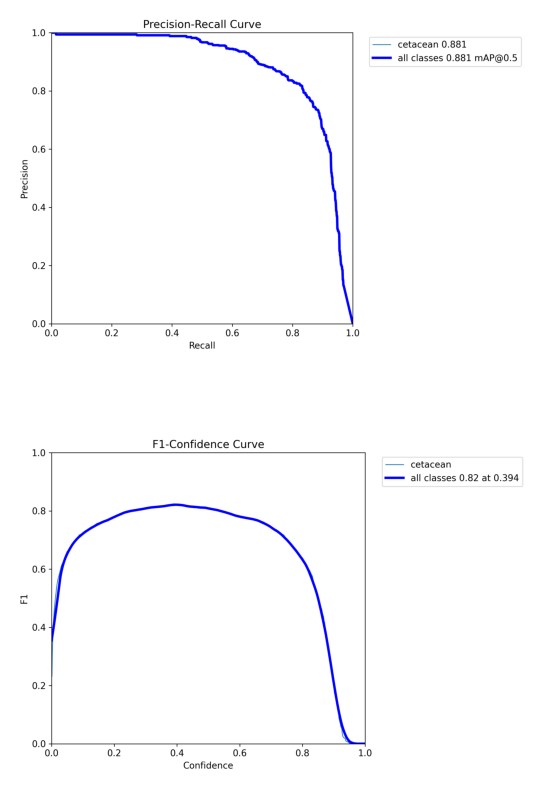

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
pr_curve = Image.open("runs/detect/val10/PR_curve.png")
f1_curve = Image.open("runs/detect/val10/F1_curve.png")
fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].imshow(pr_curve)
ax[0].axis("off")
ax[1].imshow(f1_curve)
ax[1].axis("off")

In [28]:
best.predict("/home/jctactay/Cetacean-Detector-4/test/images", save=True, conf=0.4)


image 1/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_002_JPG.rf.f107b572ea9f829d2f15ec2fa4d57be6.jpg: 448x640 1 cetacean, 5.9ms
image 2/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_006_JPG.rf.7847906bc09768ac5cf0856cc27af653.jpg: 448x640 3 cetaceans, 5.3ms
image 3/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_009_JPG.rf.ee897b39ac7878276f912c86dc120c00.jpg: 448x640 (no detections), 5.2ms
image 4/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_045_JPG.rf.03bf6e98ce23bfe0b79b509849c4a8c5.jpg: 448x640 1 cetacean, 5.3ms
image 5/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_050_JPG.rf.082f57e07b746282e3c1d4dc7fa08c2a.jpg: 448x640 1 cetacean, 5.3ms
image 6/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_075_JPG.rf.0f47b4d71c20776ebf0f0c7ed2f18299.jpg: 448x640 1 cetacean, 5.1ms
image 7/185 /home/jctactay/Cetacean-Det

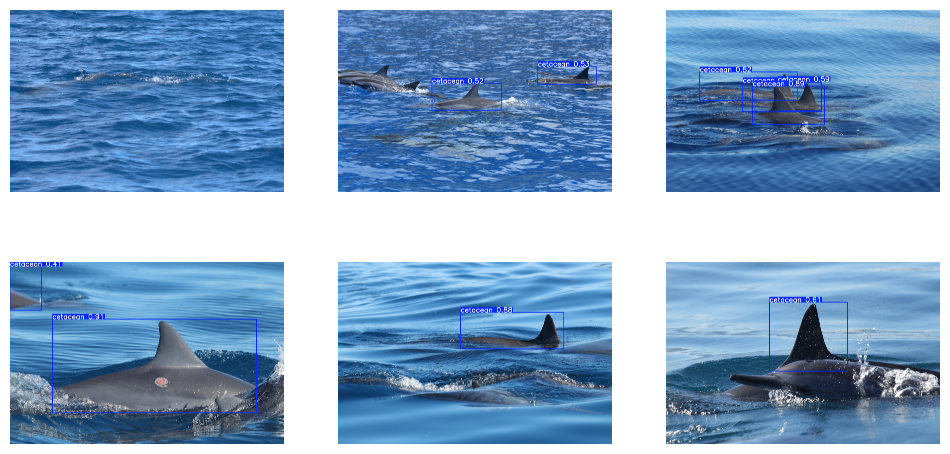

In [30]:
import os
import random as rand
pred_dir = "runs/detect/predict2"
imgs = os.listdir(pred_dir)
fig, axes = plt.subplots(2,3, figsize=(12,6))
for img, ax in zip(rand.sample(imgs, 6), axes.flatten()):
    path = os.path.join(pred_dir, img)
    ax.imshow(Image.open(path))
    ax.axis("off")

### 16 batch model

In [32]:
# 100 epochs, 16 batch
best = YOLO("runs/detect/train24/weights/best.pt")

metrics = best.val(data=f"{dataset.location}/data.yaml")

Ultralytics YOLOv8.2.102 🚀 Python-3.11.8 torch-2.3.1+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32494MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /home/jctactay/Cetacean-Detector-4/valid/labels.cache... 378 images, 57 backgrounds, 0 corrupt: 100%|██████████| 378/378 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:27<00:00,  3.65s/it]


                   all        378        562       0.82      0.747      0.846      0.556
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val12


(-0.5, 2249.5, 1499.5, -0.5)

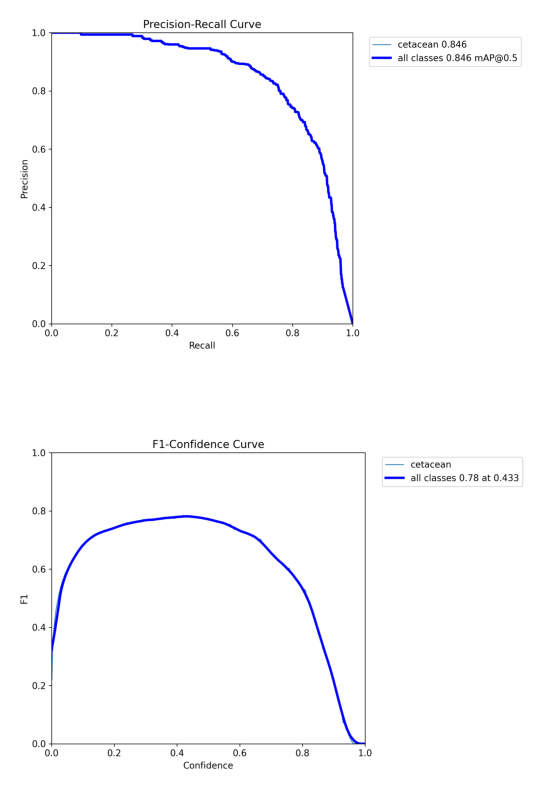

In [33]:
pr_curve = Image.open("runs/detect/val12/PR_curve.png")
f1_curve = Image.open("runs/detect/val12/F1_curve.png")
fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].imshow(pr_curve)
ax[0].axis("off")
ax[1].imshow(f1_curve)
ax[1].axis("off")

In [34]:
best.predict("/home/jctactay/Cetacean-Detector-4/test/images", save=True, conf=0.4)


image 1/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_002_JPG.rf.f107b572ea9f829d2f15ec2fa4d57be6.jpg: 448x640 1 cetacean, 6.9ms
image 2/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_006_JPG.rf.7847906bc09768ac5cf0856cc27af653.jpg: 448x640 2 cetaceans, 8.3ms
image 3/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_009_JPG.rf.ee897b39ac7878276f912c86dc120c00.jpg: 448x640 (no detections), 6.0ms
image 4/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_045_JPG.rf.03bf6e98ce23bfe0b79b509849c4a8c5.jpg: 448x640 1 cetacean, 5.7ms
image 5/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_050_JPG.rf.082f57e07b746282e3c1d4dc7fa08c2a.jpg: 448x640 (no detections), 5.5ms
image 6/185 /home/jctactay/Cetacean-Detector-4/test/images/2021-08-17_D500_CL_Photo_075_JPG.rf.0f47b4d71c20776ebf0f0c7ed2f18299.jpg: 448x640 (no detections), 6.0ms
image 7/185 /home/jctactay/Ce

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cetacean'}
 obb: None
 orig_img: array([[[157, 117,  69],
         [156, 116,  68],
         [155, 115,  67],
         ...,
         [145, 106,  61],
         [143, 104,  59],
         [142, 103,  58]],
 
        [[156, 116,  68],
         [156, 116,  68],
         [155, 115,  67],
         ...,
         [146, 107,  62],
         [144, 105,  60],
         [143, 104,  59]],
 
        [[156, 116,  68],
         [155, 115,  67],
         [155, 115,  67],
         ...,
         [146, 107,  62],
         [145, 106,  61],
         [144, 105,  60]],
 
        ...,
 
        [[134,  92,  47],
         [133,  91,  46],
         [133,  91,  46],
         ...,
         [158, 118,  70],
         [158, 118,  70],
         [157, 117,  69]],
 
        [[133,  91,  46],
         [133,  91,  46],
         [133,  91,  46],
         ...,
         [160, 1

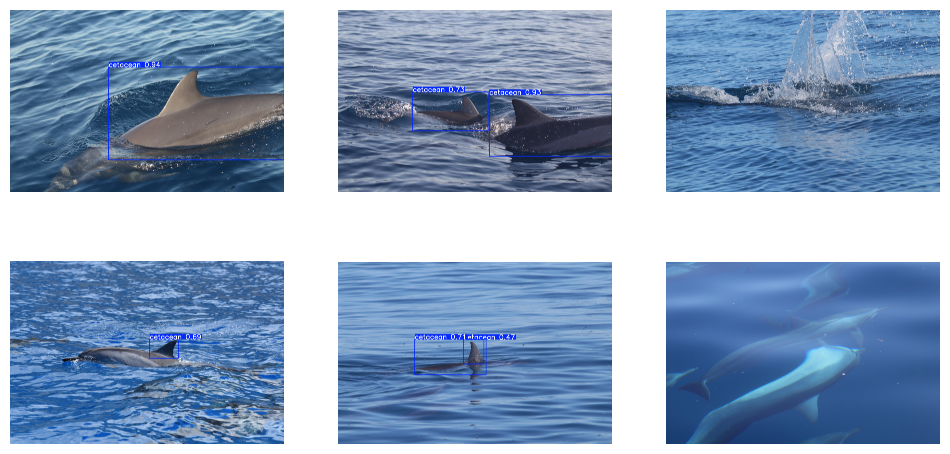

In [35]:
pred_dir = "runs/detect/predict3"
imgs = os.listdir(pred_dir)
fig, axes = plt.subplots(2,3, figsize=(12,6))
for img, ax in zip(rand.sample(imgs, 6), axes.flatten()):
    path = os.path.join(pred_dir, img)
    ax.imshow(Image.open(path))
    ax.axis("off")

### Comparison

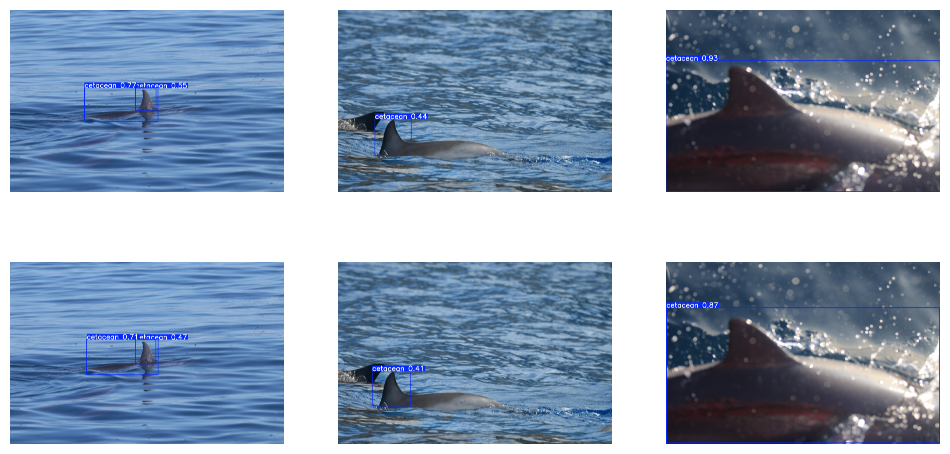

In [39]:
sampled_imgs = rand.sample(imgs,3)
fig, ax = plt.subplots(2,3, figsize=(12,6))
for i in range(len(sampled_imgs)):
    path = os.path.join("runs/detect/predict2", sampled_imgs[i])
    ax[0, i].imshow(Image.open(path))
    path = os.path.join("runs/detect/predict3", sampled_imgs[i])
    ax[1, i].imshow(Image.open(path))
    ax[0, i].axis("off")
    ax[1, i].axis("off")

Model trained on 32-batch size mostly predicts the same boxes as the model trained on 16-batch size, but the predictions are of higher confidence.

## Deployment

In [40]:
project.version(4).deploy(model_type="yolov8", model_path="/home/jctactay/runs/detect/train21/")

Dependency ultralytics==8.0.196 is required but found version=8.2.102, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/whalecrop/cetacean-detector/4
Share your model with the world at: https://universe.roboflow.com/whalecrop/cetacean-detector/model/4
